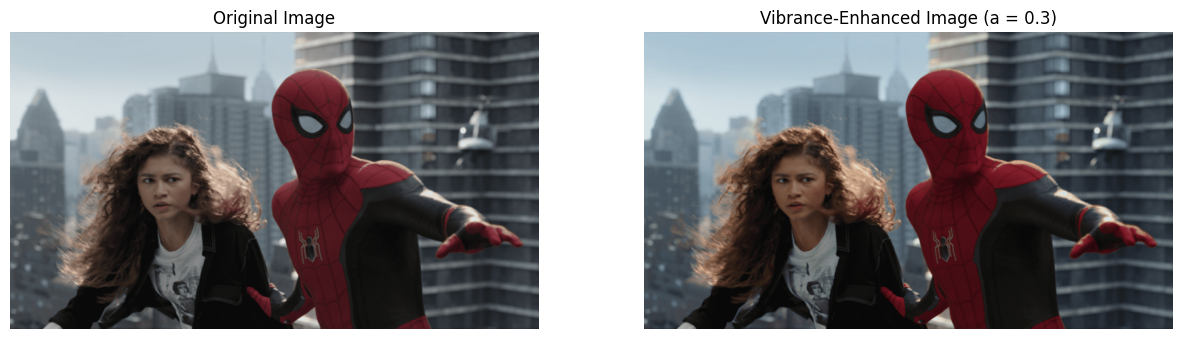

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('utils/spider.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV

# Split the HSV channels
hue, saturation, value = cv2.split(image_hsv)

# Define the transformation function
def enhance_vibrance(sat, a, sigma=70):
    x = sat.astype(np.float32)  # Convert to float for calculations
    transformed = x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
    return np.clip(transformed, 0, 255).astype(np.uint8)  # Clip values to be between 0 and 255

# Apply transformation with a = 0.3
a = 0.3
enhanced_saturation = enhance_vibrance(saturation, a)

# Recombine the HSV channels
enhanced_hsv = cv2.merge([hue, enhanced_saturation, value])
enhanced_image = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2RGB)  # Convert back to RGB

# Plot the original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(enhanced_image)
axes[1].set_title(f'Vibrance-Enhanced Image (a = {a})')
axes[1].axis('off')

plt.show()

Intensity Transformation Plot

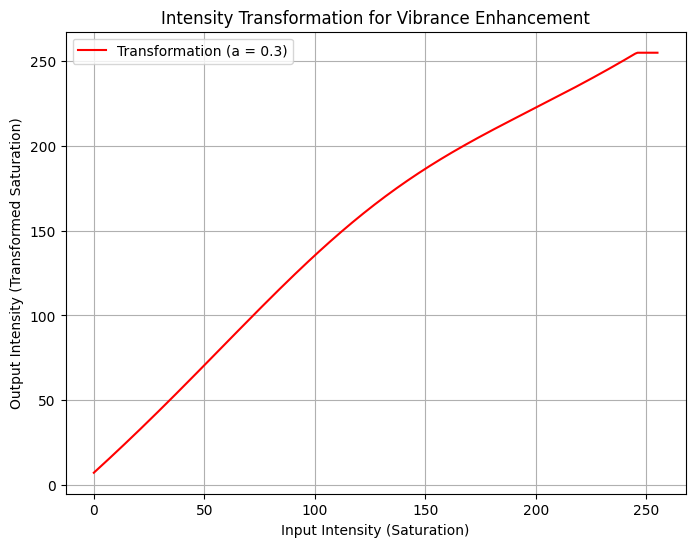

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create input intensity values (range of possible saturation values)
x_values = np.arange(0, 256, 1, dtype=np.float32)

# Apply the vibrance enhancement transformation for the intensity values
sigma = 70
a = 0.3  # Amplification factor
transformation_values = x_values + a * 128 * np.exp(-((x_values - 128) ** 2) / (2 * sigma ** 2))
transformation_values = np.clip(transformation_values, 0, 255)  # Clip values to the range [0, 255]

# Plot the original intensity vs the transformed intensity
plt.figure(figsize=(8, 6))
plt.plot(x_values, transformation_values, color='r', label=f'Transformation (a = {a})')
plt.xlabel('Input Intensity (Saturation)')
plt.ylabel('Output Intensity (Transformed Saturation)')
plt.title('Intensity Transformation for Vibrance Enhancement')
plt.grid(True)
plt.legend()
plt.show()